# Importing and addressing the Problem

In [21]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [22]:
df = pd.read_csv('/Users/jason/Desktop/CCT/Machine Learning/CA1/archive (5)/diabetes_012_health_indicators_BRFSS2015.csv')
pd.set_option('display.max_columns', None)

In [23]:
df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
1                        0.0           1.0     0.0      0.0   
2                        0.0           0.0     1.0      0.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                     0.0            1.0          0.0      5.0      18.0   
1                     0.0            0.0          1.0      3.0       0.0   
2                     0.0            1.0          1.0      5.0      30.0   
3                     0.0            1.0          0.0      2.0       0.0   
4                     0.0            1.0          0.0      2.0       3.0   
...                   ...            ...          ...      ...       ...   
253675                0.0            1.0          0.0      3.0       0.0   
253676                0.0            1.0          0.0      4.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      3.0       0.0   
253679                0.0            1.0          0.0      2.0       0.0   

        PhysHlth  DiffWalk  Sex   Age  Education  Income  
0           15.0       1.0  0.0   9.0        4.0     3.0  
1            0.0       0.0  0.0   7.0        6.0     1.0  
2           30.0       1.0  0.0   9.0        4.0     8.0  
3            0.0       0.0  0.0  11.0        3.0     6.0  
4            0.0       0.0  0.0  11.0        5.0     4.0  
...          ...       ...  ...   ...        ...     ...  
253675       5.0       0.0  1.0   5.0        6.0     7.0  
253676       0.0       1.0  0.0  11.0        2.0     4.0  
253677       0.0       0.0  0.0   2.0        5.0     2.0  
253678       0.0       0.0  1.0   7.0        5.0     1.0  
253679       0.0       0.0  0.0   9.0        6.0     2.0  

[253680 rows x 22 columns]

In [24]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

# Preprocessing

Checklist 
Null values
Duplicates
Categorial data


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [26]:
df.duplicated().sum()

23899

In [27]:
df.drop_duplicates()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
1                        0.0           1.0     0.0      0.0   
2                        0.0           0.0     1.0      0.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                     0.0            1.0          0.0      5.0      18.0   
1                     0.0            0.0          1.0      3.0       0.0   
2                     0.0            1.0          1.0      5.0      30.0   
3                     0.0            1.0          0.0      2.0       0.0   
4                     0.0            1.0          0.0      2.0       3.0   
...                   ...            ...          ...      ...       ...   
253675                0.0            1.0          0.0      3.0       0.0   
253676                0.0            1.0          0.0      4.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      3.0       0.0   
253679                0.0            1.0          0.0      2.0       0.0   

        PhysHlth  DiffWalk  Sex   Age  Education  Income  
0           15.0       1.0  0.0   9.0        4.0     3.0  
1            0.0       0.0  0.0   7.0        6.0     1.0  
2           30.0       1.0  0.0   9.0        4.0     8.0  
3            0.0       0.0  0.0  11.0        3.0     6.0  
4            0.0       0.0  0.0  11.0        5.0     4.0  
...          ...       ...  ...   ...        ...     ...  
253675       5.0       0.0  1.0   5.0        6.0     7.0  
253676       0.0       1.0  0.0  11.0        2.0     4.0  
253677       0.0       0.0  0.0   2.0        5.0     2.0  
253678       0.0       0.0  1.0   7.0        5.0     1.0  
253679       0.0       0.0  0.0   9.0        6.0     2.0  

[229781 rows x 22 columns]

In [28]:
df = df.drop_duplicates()

In [29]:
df

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
1                        0.0           1.0     0.0      0.0   
2                        0.0           0.0     1.0      0.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                     0.0            1.0          0.0      5.0      18.0   
1                     0.0            0.0          1.0      3.0       0.0   
2                     0.0            1.0          1.0      5.0      30.0   
3                     0.0            1.0          0.0      2.0       0.0   
4                     0.0            1.0          0.0      2.0       3.0   
...                   ...            ...          ...      ...       ...   
253675                0.0            1.0          0.0      3.0       0.0   
253676                0.0            1.0          0.0      4.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      3.0       0.0   
253679                0.0            1.0          0.0      2.0       0.0   

        PhysHlth  DiffWalk  Sex   Age  Education  Income  
0           15.0       1.0  0.0   9.0        4.0     3.0  
1            0.0       0.0  0.0   7.0        6.0     1.0  
2           30.0       1.0  0.0   9.0        4.0     8.0  
3            0.0       0.0  0.0  11.0        3.0     6.0  
4            0.0       0.0  0.0  11.0        5.0     4.0  
...          ...       ...  ...   ...        ...     ...  
253675       5.0       0.0  1.0   5.0        6.0     7.0  
253676       0.0       1.0  0.0  11.0        2.0     4.0  
253677       0.0       0.0  0.0   2.0        5.0     2.0  
253678       0.0       0.0  1.0   7.0        5.0     1.0  
253679       0.0       0.0  0.0   9.0        6.0     2.0  

[229781 rows x 22 columns]

In [30]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64

In [31]:
diabetes_02_index = df[df['Diabetes_012']==2].index
df.loc[diabetes_02_index, ['Diabetes_012']] = 1
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    190055
1.0     39726
Name: count, dtype: int64

In [32]:
correlation_matrix = df.corr()
print(correlation_matrix['Diabetes_012'])

Diabetes_012            1.000000
HighBP                  0.260346
HighChol                0.204418
CholCheck               0.076190
BMI                     0.211155
Smoker                  0.046262
Stroke                  0.097685
HeartDiseaseorAttack    0.167184
PhysActivity           -0.102391
Fruits                 -0.024968
Veggies                -0.043339
HvyAlcoholConsump      -0.066111
AnyHealthcare           0.023756
NoDocbcCost             0.025940
GenHlth                 0.282328
MentHlth                0.058826
PhysHlth                0.158697
DiffWalk                0.208126
Sex                     0.030797
Age                     0.185479
Education              -0.108504
Income                 -0.147809
Name: Diabetes_012, dtype: float64


In [33]:
correlations = df.corr()['Diabetes_012']

strong_correlations = correlations[(correlations <= -0.1) | (correlations >= 0.1)]

print(strong_correlations)

Diabetes_012            1.000000
HighBP                  0.260346
HighChol                0.204418
BMI                     0.211155
HeartDiseaseorAttack    0.167184
PhysActivity           -0.102391
GenHlth                 0.282328
PhysHlth                0.158697
DiffWalk                0.208126
Age                     0.185479
Education              -0.108504
Income                 -0.147809
Name: Diabetes_012, dtype: float64


In [34]:
from ydata_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model #1 Logistic Regression

## 20%

In [35]:
columns = ["HighBP", "HighChol", "BMI", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "GenHlth", "PhysHlth", "DiffWalk", "Age", "Education", "Income"]

clean_df = df[columns]

In [36]:
X = clean_df
y = df['Diabetes_012']

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [39]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled) 

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7143199077398438
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.71      0.80     37836
         1.0       0.35      0.74      0.48      8121

    accuracy                           0.71     45957
   macro avg       0.64      0.73      0.64     45957
weighted avg       0.83      0.71      0.75     45957

Confusion Matrix:
 [[26787 11049]
 [ 2080  6041]]


In [41]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')  
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Accuracy = {score}")

average_score = scores.mean()
print(f"\nAverage Accuracy: {average_score}")

Fold 1: Accuracy = 0.8333659725395478
Fold 2: Accuracy = 0.8320567499347201
Fold 3: Accuracy = 0.8337540255896945
Fold 4: Accuracy = 0.8315562712159457
Fold 5: Accuracy = 0.8336452258682218

Average Accuracy: 0.8328756490296259


In [42]:
feature_names= X.columns  

coefficients = model.coef_[0] 
importances = np.abs(coefficients)

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature GenHlth (0.6029287321706189)
2. feature Age (0.5053302817601016)
3. feature BMI (0.49832285934057885)
4. feature HighBP (0.3238010025048532)
5. feature HighChol (0.2960219800408016)
6. feature PhysHlth (0.09985376574337575)
7. feature Income (0.07407182020040022)
8. feature HeartDiseaseorAttack (0.07034523307804436)
9. feature Education (0.03125006023528895)
10. feature Stroke (0.02244463349661451)
11. feature DiffWalk (0.019617939871396425)
12. feature PhysActivity (0.00021798679195195566)


## 25%

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [44]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled) 

LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7133133725585767
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.71      0.80     47275
         1.0       0.35      0.74      0.48     10171

    accuracy                           0.71     57446
   macro avg       0.64      0.72      0.64     57446
weighted avg       0.83      0.71      0.74     57446

Confusion Matrix:
 [[33430 13845]
 [ 2624  7547]]


In [46]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy') 
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Accuracy = {score}")

average_score = scores.mean()
print(f"\nAverage Accuracy: {average_score}")

Fold 1: Accuracy = 0.8333659725395478
Fold 2: Accuracy = 0.8320567499347201
Fold 3: Accuracy = 0.8337540255896945
Fold 4: Accuracy = 0.8315562712159457
Fold 5: Accuracy = 0.8336452258682218

Average Accuracy: 0.8328756490296259


## 30%

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=0)

In [48]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [49]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7122941901791543
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.71      0.80     56750
         1.0       0.35      0.74      0.48     12185

    accuracy                           0.71     68935
   macro avg       0.64      0.72      0.64     68935
weighted avg       0.83      0.71      0.74     68935

Confusion Matrix:
 [[40043 16707]
 [ 3126  9059]]


In [50]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Accuracy = {score}")

average_score = scores.mean()
print(f"\nAverage Accuracy: {average_score}")

Fold 1: Accuracy = 0.8333659725395478
Fold 2: Accuracy = 0.8320567499347201
Fold 3: Accuracy = 0.8337540255896945
Fold 4: Accuracy = 0.8315562712159457
Fold 5: Accuracy = 0.8336452258682218

Average Accuracy: 0.8328756490296259


# Model #2 Random Forest

## 20%

In [51]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 0)

In [53]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [54]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8178514698522532
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     37836
         1.0       0.47      0.22      0.30      8121

    accuracy                           0.82     45957
   macro avg       0.66      0.59      0.60     45957
weighted avg       0.78      0.82      0.79     45957

Confusion Matrix:
 [[35759  2077]
 [ 6294  1827]]


## 25%

In [55]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [57]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf_RF = RandomForestClassifier(n_estimators = 100)
clf_RF.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [58]:
y_pred = clf_RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.82

Confusion Matrix:
[[44715  2560]
 [ 7872  2299]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     47275
         1.0       0.47      0.23      0.31     10171

    accuracy                           0.82     57446
   macro avg       0.66      0.59      0.60     57446
weighted avg       0.78      0.82      0.79     57446



## 30% 

In [59]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf_RF = RandomForestClassifier(n_estimators = 100)
clf_RF.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [62]:
y_pred = clf_RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.82

Confusion Matrix:
[[53724  3026]
 [ 9428  2757]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     56750
         1.0       0.48      0.23      0.31     12185

    accuracy                           0.82     68935
   macro avg       0.66      0.59      0.60     68935
weighted avg       0.78      0.82      0.79     68935



# Decision Tree

## 20%

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [64]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
dt_classifier = DecisionTreeClassifier(max_depth = 4, random_state=0)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [65]:
y_pred = dt_classifier.predict(X_test)

result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

       Actual  Predicted
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         1.0        0.0
...       ...        ...
45952     0.0        0.0
45953     0.0        1.0
45954     0.0        0.0
45955     1.0        1.0
45956     0.0        0.0

[45957 rows x 2 columns]


In [66]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.79

Confusion Matrix:
[[32803  5033]
 [ 4589  3532]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     37836
         1.0       0.41      0.43      0.42      8121

    accuracy                           0.79     45957
   macro avg       0.64      0.65      0.65     45957
weighted avg       0.80      0.79      0.79     45957



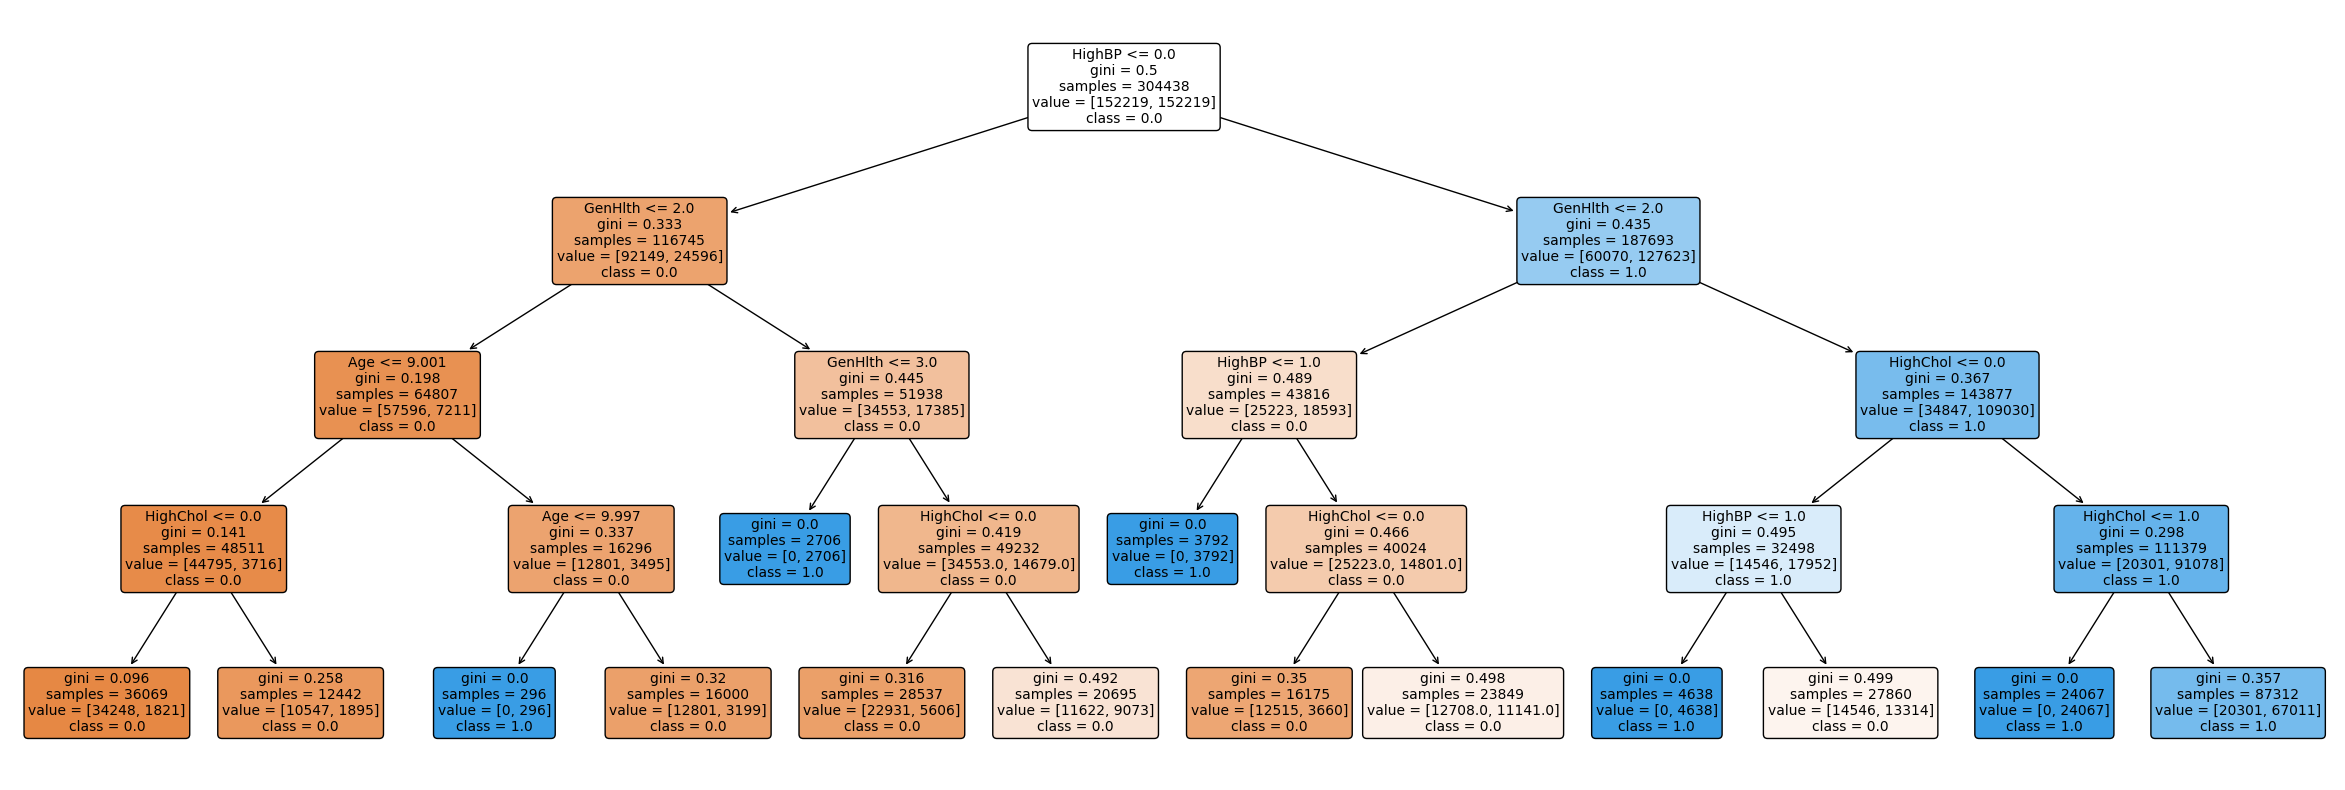

In [67]:
plt.figure(figsize=(30, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=df['Diabetes_012'].unique().astype(str).tolist(), rounded=True, fontsize=10)
plt.show()

In [68]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

Accuracy scores for each fold: [0.82313902 0.82259117 0.82652972 0.82620332 0.82639916]
Mean cross-validation score: 0.8249724817694262


In [69]:
importances=  dt_classifier.feature_importances_
indices =np.argsort(importances)[::-1]
feature_names = X.columns    
indices =np.argsort(importances)[::-1]  
print ("Feature ranking:")
for f in range(len(feature_names)):  
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature HighBP (0.6246123415728027)
2. feature GenHlth (0.21961517876854744)
3. feature HighChol (0.14151689743274168)
4. feature Age (0.014255582225908116)
5. feature Fruits (0.0)
6. feature CholCheck (0.0)
7. feature BMI (0.0)
8. feature Smoker (0.0)
9. feature Stroke (0.0)
10. feature HeartDiseaseorAttack (0.0)
11. feature PhysActivity (0.0)
12. feature Income (0.0)
13. feature Veggies (0.0)
14. feature Education (0.0)
15. feature AnyHealthcare (0.0)
16. feature NoDocbcCost (0.0)
17. feature MentHlth (0.0)
18. feature PhysHlth (0.0)
19. feature DiffWalk (0.0)
20. feature Sex (0.0)
21. feature HvyAlcoholConsump (0.0)


## 25%

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [71]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
dt_classifier = DecisionTreeClassifier(max_depth = 4, random_state=0)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [72]:
y_pred = dt_classifier.predict(X_test)

result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

       Actual  Predicted
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         1.0        0.0
...       ...        ...
57441     0.0        0.0
57442     0.0        0.0
57443     0.0        0.0
57444     1.0        1.0
57445     1.0        1.0

[57446 rows x 2 columns]


In [73]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.79

Confusion Matrix:
[[40924  6351]
 [ 5740  4431]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     47275
         1.0       0.41      0.44      0.42     10171

    accuracy                           0.79     57446
   macro avg       0.64      0.65      0.65     57446
weighted avg       0.79      0.79      0.79     57446



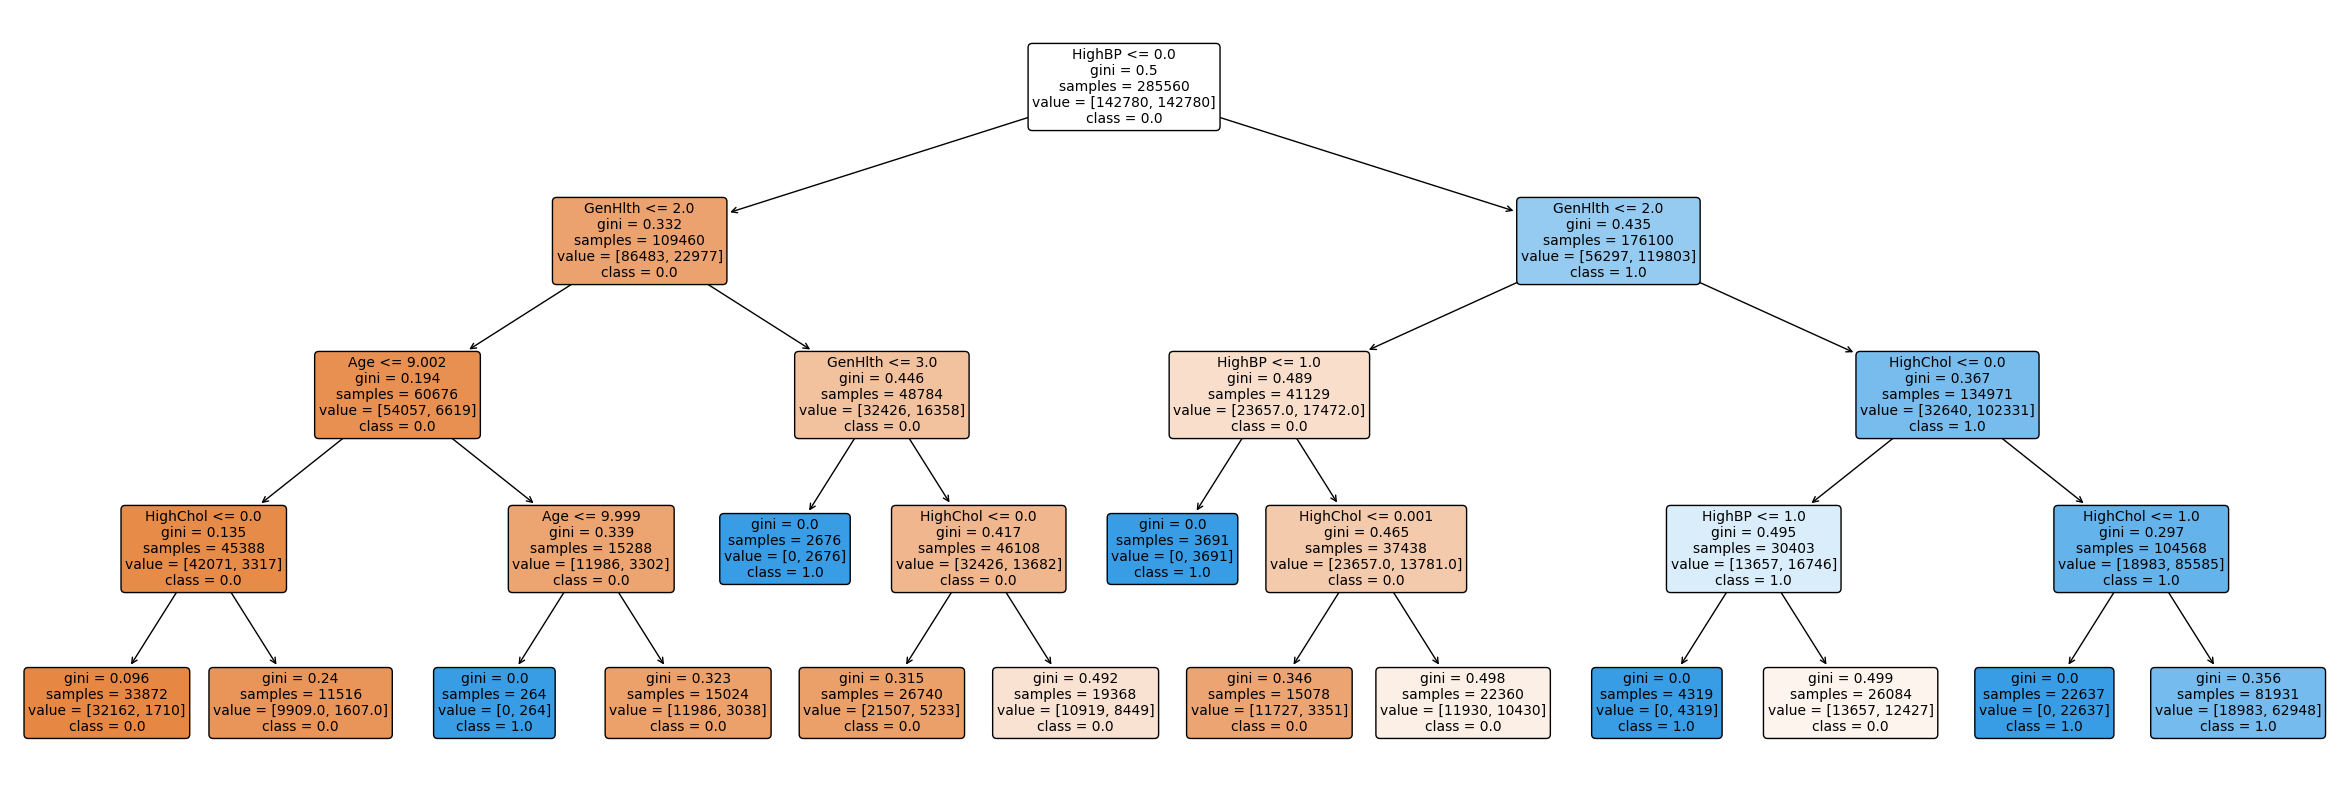

In [74]:
plt.figure(figsize=(30, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=df['Diabetes_012'].unique().astype(str).tolist(), rounded=True, fontsize=10)
plt.show()

In [75]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

Accuracy scores for each fold: [0.82361773 0.82315693 0.82585517 0.82679084 0.82596397]
Mean cross-validation score: 0.8250769274187066


## 30%

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [77]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
dt_classifier = DecisionTreeClassifier(max_depth = 4, random_state=0)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [78]:
y_pred = dt_classifier.predict(X_test)

result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df)

       Actual  Predicted
0         0.0        0.0
1         0.0        0.0
2         0.0        0.0
3         0.0        0.0
4         1.0        0.0
...       ...        ...
68930     0.0        0.0
68931     0.0        0.0
68932     0.0        0.0
68933     0.0        0.0
68934     0.0        0.0

[68935 rows x 2 columns]


In [79]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.79

Confusion Matrix:
[[49114  7636]
 [ 6844  5341]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     56750
         1.0       0.41      0.44      0.42     12185

    accuracy                           0.79     68935
   macro avg       0.64      0.65      0.65     68935
weighted avg       0.80      0.79      0.79     68935



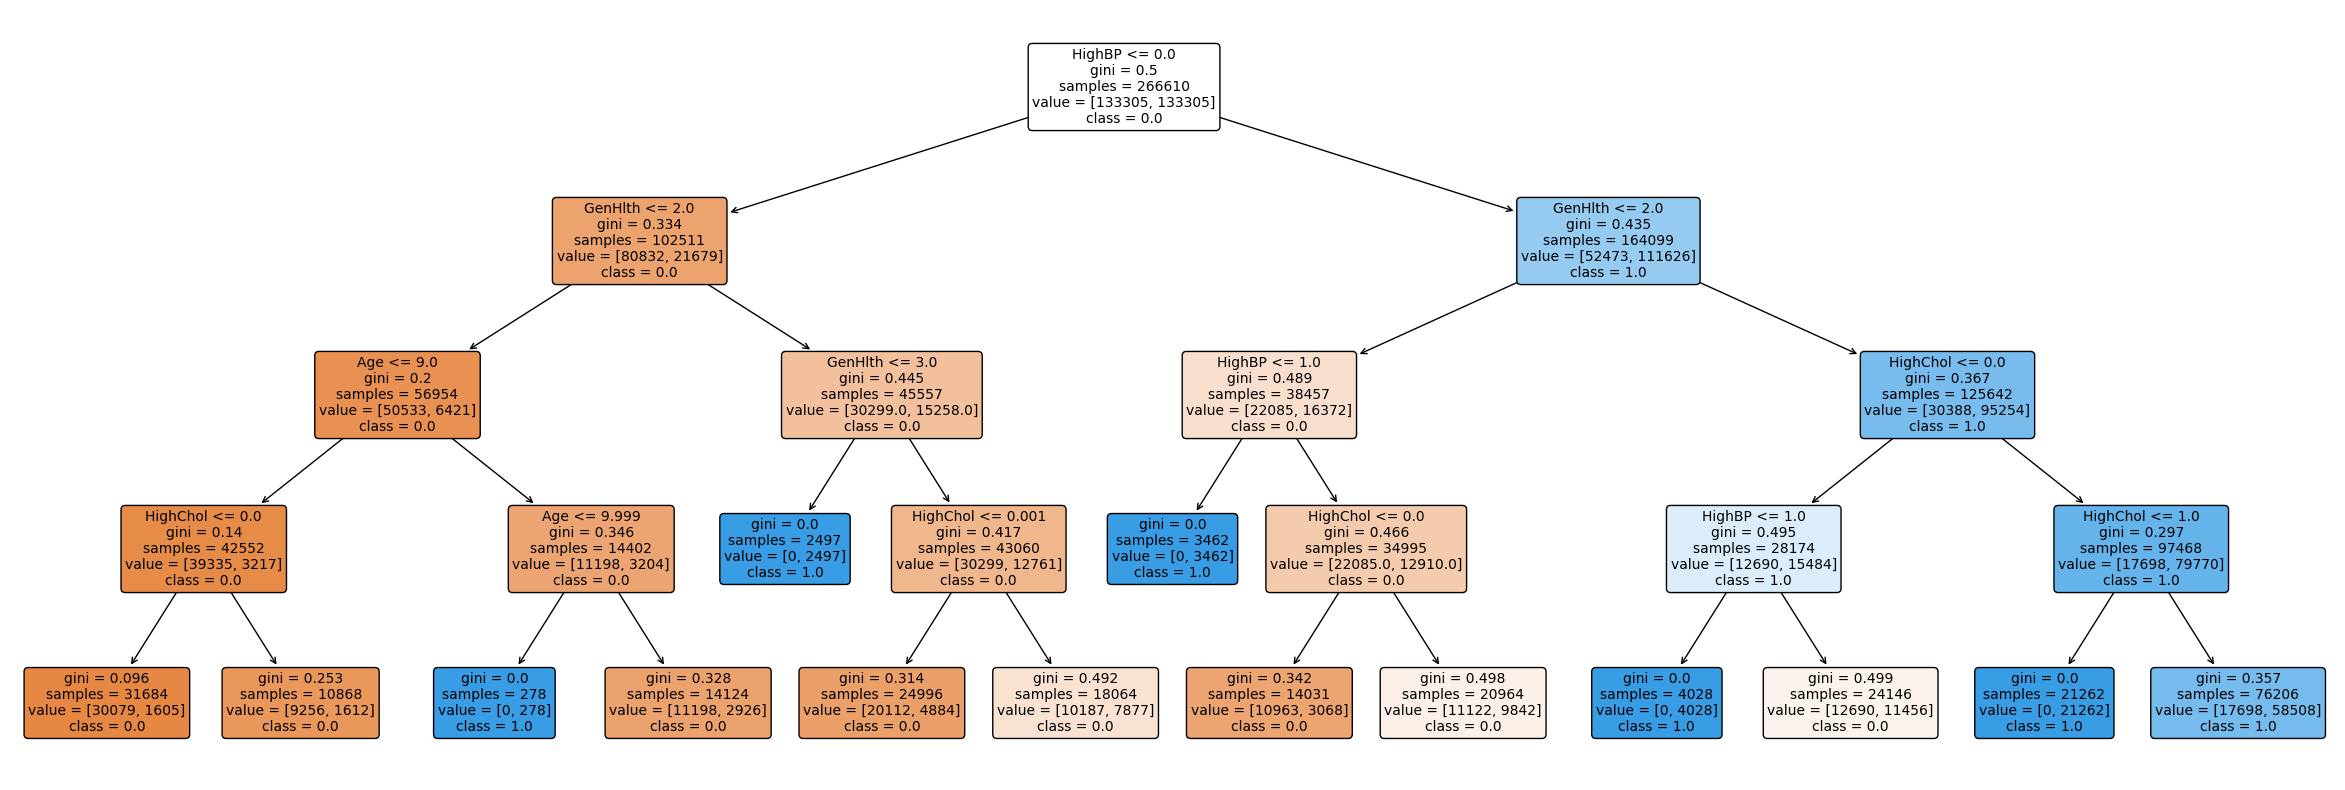

In [80]:
plt.figure(figsize=(30, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=df['Diabetes_012'].unique().astype(str).tolist(), rounded=True, fontsize=10)
plt.show()

In [81]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy scores for each fold:", scores)
print("Mean cross-validation score:", scores.mean())

Accuracy scores for each fold: [0.82477098 0.82293933 0.82518061 0.82698668 0.82687788]
Mean cross-validation score: 0.8253510976978781


# Model #3 GNB

## 20%

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [83]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
nvclassifier = GaussianNB()
nvclassifier.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [84]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1. 1. 0. ... 0. 0. 0.]


In [85]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:10]

array([[0., 1.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [86]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)

print(cm, cm.shape)
print(classification_report(y_test, y_pred))

0.6964989011467241
[[26143 11693]
 [ 2255  5866]] (2, 2)
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     37836
         1.0       0.33      0.72      0.46      8121

    accuracy                           0.70     45957
   macro avg       0.63      0.71      0.62     45957
weighted avg       0.82      0.70      0.73     45957



In [87]:
nvclassifier = GaussianNB()

print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 60).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 55).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 50).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 45).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 35).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 30).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 25).mean())

0.7485684566569861
0.7485084199505865
0.7486120589318809
0.7484990579668813
0.7485514661228972
0.7485296449900183
0.7486038518936692
0.7485297717646553


## 25%

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [89]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
nvclassifier = GaussianNB()
nvclassifier.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [90]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[1. 1. 0. ... 1. 1. 1.]


In [91]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:10]

array([[0., 1.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 1.],
       [1., 1.],
       [1., 1.]])

In [92]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)

print(cm, cm.shape)
print(classification_report(y_test, y_pred))

0.6951223757964001
[[32563 14712]
 [ 2802  7369]] (2, 2)
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     47275
         1.0       0.33      0.72      0.46     10171

    accuracy                           0.70     57446
   macro avg       0.63      0.71      0.62     57446
weighted avg       0.82      0.70      0.73     57446



In [93]:
nvclassifier = GaussianNB()
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 60).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 55).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 50).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 45).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 35).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 30).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 25).mean())

0.7485684566569861
0.7485084199505865
0.7486120589318809
0.7484990579668813
0.7485514661228972
0.7485296449900183
0.7486038518936692
0.7485297717646553


## 30%

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [95]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
nvclassifier = GaussianNB()
nvclassifier.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [96]:
y_pred = nvclassifier.predict(X_test)

print(y_pred)

[1. 1. 0. ... 0. 1. 0.]


In [97]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:,:10]

array([[0., 1.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 1.],
       [0., 0.]])

In [98]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)

print(cm, cm.shape)
print(classification_report(y_test, y_pred))

0.6950605642997026
[[39087 17663]
 [ 3358  8827]] (2, 2)
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     56750
         1.0       0.33      0.72      0.46     12185

    accuracy                           0.70     68935
   macro avg       0.63      0.71      0.62     68935
weighted avg       0.82      0.70      0.73     68935



In [99]:
nvclassifier = GaussianNB()

print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 50).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 45).mean())
print(cross_val_score(nvclassifier, X, y, scoring = 'accuracy', cv = 40).mean())


0.7486120589318809
0.7484990579668813
0.7485514661228972


# Model #4 SVM

## 20%

In [100]:
X = clean_df
y = df['Diabetes_012']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
svc_model = SVC()
svc_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(cm)

## 25%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
svc_model = SVC()
svc_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(cm)

## 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
svc_model = SVC()
svc_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(cm)

# Model Results in % 

In [2]:
df_results = pd.read_csv('/Users/jason/Desktop/Results_Final_2.csv')

In [3]:
df_results

Test Python List     Accuracy Precision (0.0) Recall (0.0)  \
0    1.0           0       0.8297            0.85         0.97   
1    2.0           1       0.8295            0.84         0.97   
2    3.0           2       0.8293            0.84         0.97   
3    4.0           3       0.8295     0.843333333         0.97   
4    5.0           4       0.7143            0.93         0.71   
5    6.0           5       0.7133            0.93         0.71   
6    7.0           6       0.7122            0.93         0.71   
7    8.0           7  0.713266667            0.93         0.71   
8    9.0           8       0.8225            0.85         0.95   
9   10.0           9       0.8222            0.85         0.96   
10  11.0          10        0.824            0.85         0.96   
11  12.0          11       0.8229            0.85  0.956666667   
12  13.0          12       0.8189            0.85         0.95   
13  14.0          13         0.82            0.85         0.95   
14  15.0          14         0.82            0.85         0.95   
15  16.0          15  0.819633333            0.85         0.95   
16  17.0          16         0.83            0.85         0.97   
17  18.0          17         0.83            0.85         0.97   
18  19.0          18         0.83            0.85         0.97   
19  20.0          19         0.83            0.85         0.97   
20  21.0          20         0.79            0.88         0.87   
21  22.0          21         0.79            0.88         0.87   
22  23.0          22         0.79            0.88         0.87   
23  24.0          23         0.79            0.88         0.87   
24  25.0          24       0.7493             0.9         0.79   
25  26.0          25       0.7482             0.9         0.79   
26  27.0          26       0.7493            0.89         0.79   
27  28.0          27  0.748933333     0.896666667         0.79   
28  29.0          28       0.6965            0.92         0.69   
29  30.0          29       0.6951            0.92         0.69   
30  31.0          30       0.6951            0.92         0.69   
31  32.0          31  0.695566667            0.92         0.69   
32  33.0          32         0.83            0.83            1   
33  34.0          33         0.83            0.83            1   
34  35.0          34         0.83            0.83            1   
35  36.0          35         0.83            0.83            1   
36  37.0          36          NaN             NaN          NaN   
37  38.0          37          NaN             NaN          NaN   
38  39.0          38          NaN             NaN          NaN   
39  40.0          39          NaN             NaN          NaN   
40   NaN         NaN          NaN             NaN          NaN   
41   NaN         1_4           LR               a    20% split   
42   NaN         5_8          LRS               b    25% split   
43   NaN        9_12           RF               c   30% splite   
44   NaN       13_16          RFS               d         mean   
45   NaN       17_20           DT             NaN          NaN   
46   NaN       21_24          DTS             NaN          NaN   
47   NaN       25_28          GNB             NaN          NaN   
48   NaN       29_32         GNBS             NaN          NaN   
49   NaN       33_36          SVM             NaN          NaN   
50   NaN       37_40         SVMS             NaN          NaN   

    F1-Score (0.0)  Support (0.0)  Precision (1.0)  Recall (1.0)  \
0             0.90    37836.00000         0.560000      0.170000   
1             0.90    47275.00000         0.560000      0.170000   
2             0.90    56750.00000         0.560000      0.170000   
3             0.90    47287.00000         0.560000      0.170000   
4             0.80    37836.00000         0.350000      0.740000   
5             0.80    47275.00000         0.350000      0.740000   
6             0.80    56750.00000         0.350000      0.740000   
7             0.80    47287

## Logistic Regression

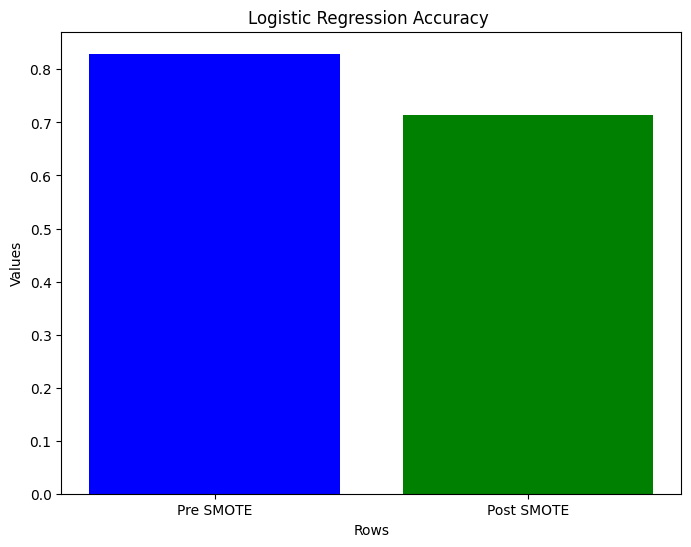

In [5]:
import matplotlib.pyplot as plt

row1_value = df_results['Accuracy'].iloc[3]  
row2_value = df_results['Accuracy'].iloc[7]  

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('Logistic Regression Accuracy ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

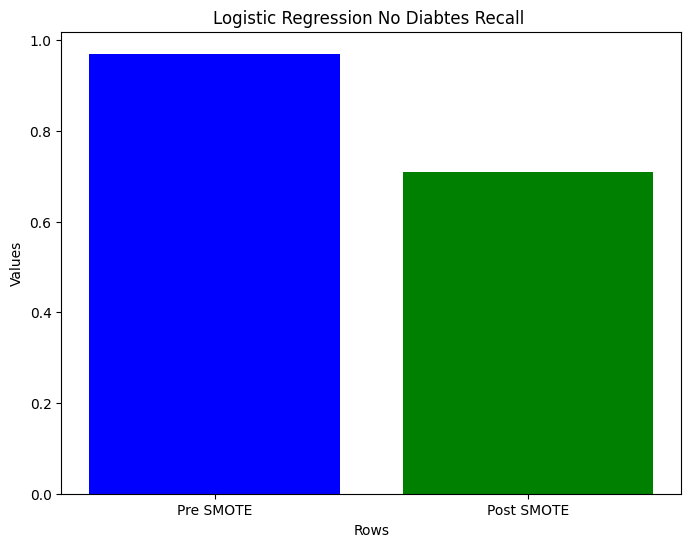

In [6]:
row1_value = df_results['Recall (0.0)'].iloc[3] 
row2_value = df_results['Recall (0.0)'].iloc[7]  

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('Logistic Regression No Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

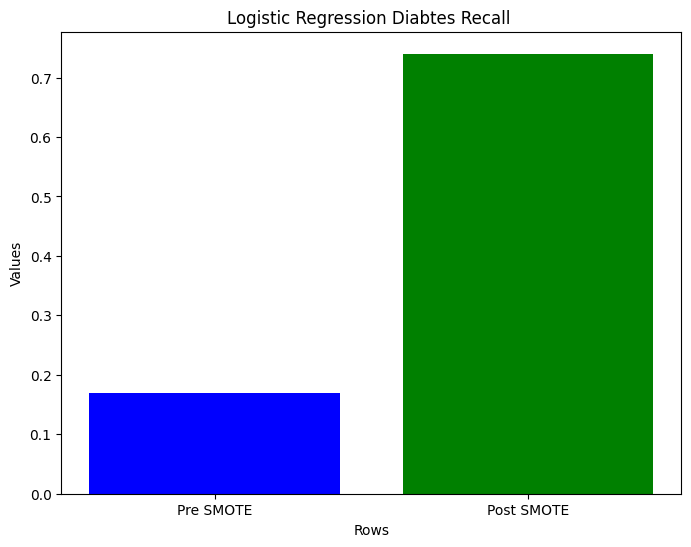

In [7]:
row1_value = df_results['Recall (1.0)'].iloc[3]  
row2_value = df_results['Recall (1.0)'].iloc[7]  

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('Logistic Regression Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

## Random Forest

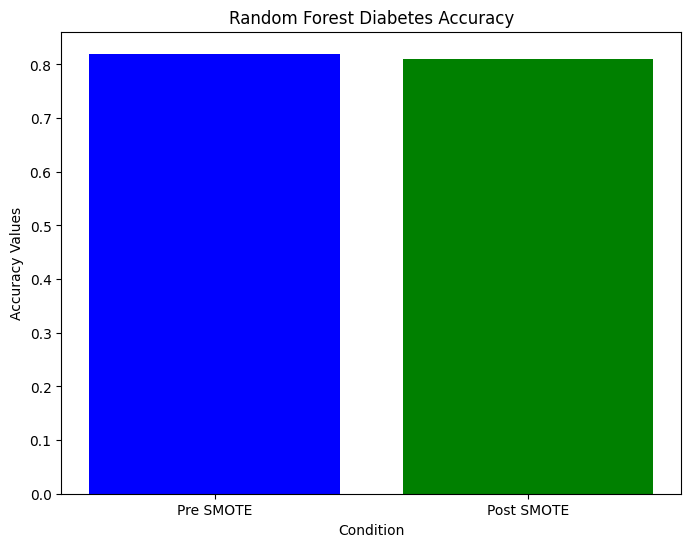

In [16]:
row1_value = 0.82 
row2_value = 0.81 

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('Random Forest Diabetes Accuracy')
plt.xlabel('Condition')
plt.ylabel('Accuracy Values')

plt.show()

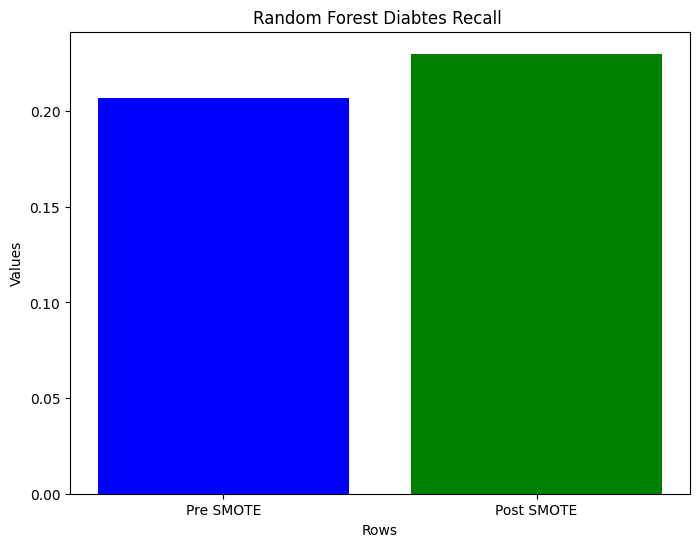

In [9]:
row1_value = df_results['Recall (1.0)'].iloc[11]  
row2_value = df_results['Recall (1.0)'].iloc[15]  

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('Random Forest Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

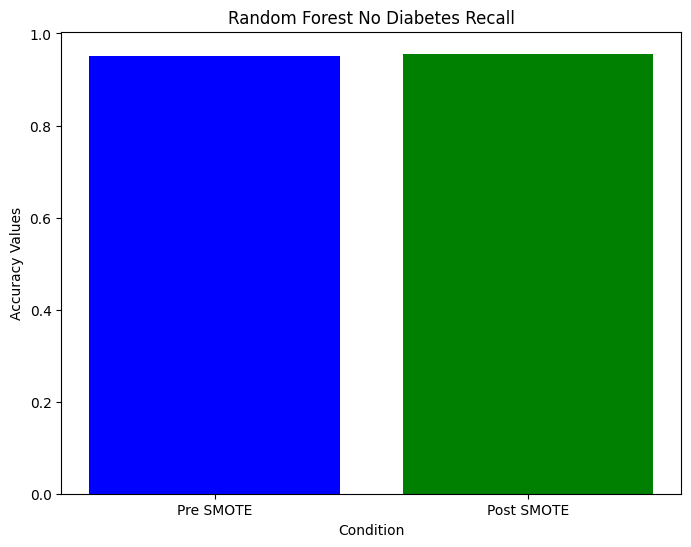

In [19]:
row1_value = 0.95 
row2_value = 0.956 

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('Random Forest No Diabetes Recall')
plt.xlabel('Condition')
plt.ylabel('Accuracy Values')

plt.show()

## Decision Tree

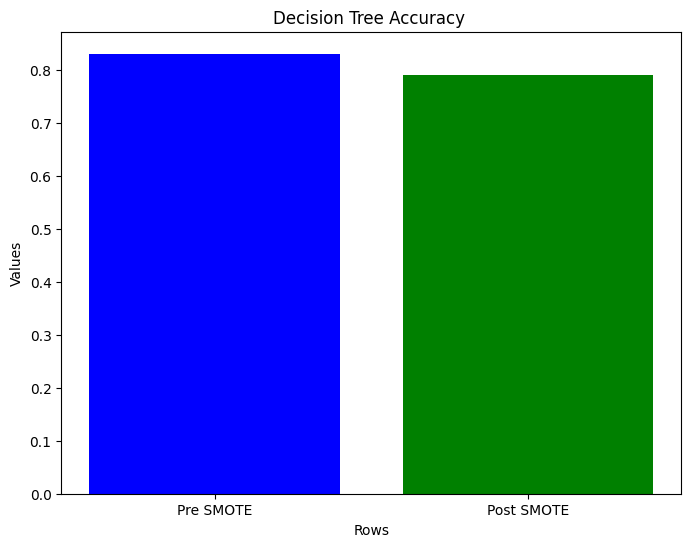

In [11]:
row1_value = df_results['Accuracy'].iloc[15] 
row2_value = df_results['Accuracy'].iloc[19]  

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('Decision Tree Accuracy ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

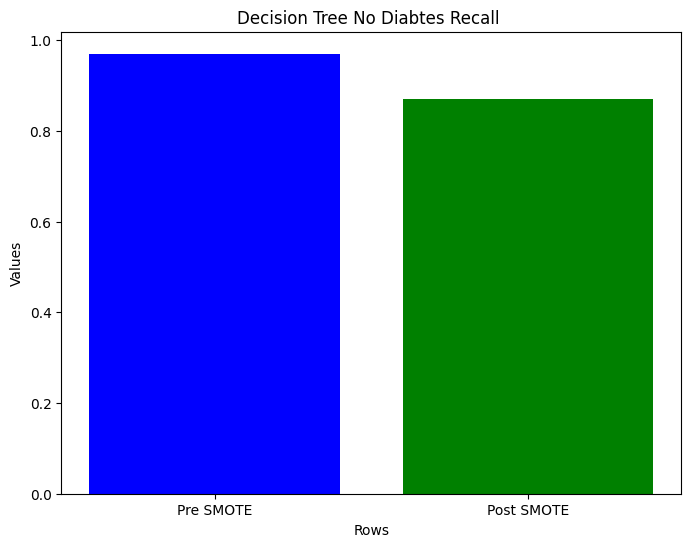

In [12]:
row1_value = df_results['Recall (0.0)'].iloc[15]  
row2_value = df_results['Recall (0.0)'].iloc[19] 

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])
plt.title('Decision Tree No Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

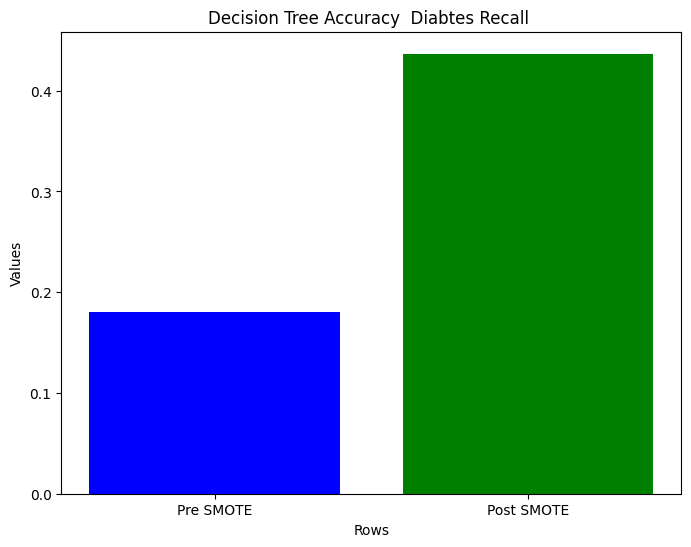

In [13]:
row1_value = df_results['Recall (1.0)'].iloc[15]
row2_value = df_results['Recall (1.0)'].iloc[19]  


plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('Decision Tree Accuracy  Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

## GNB

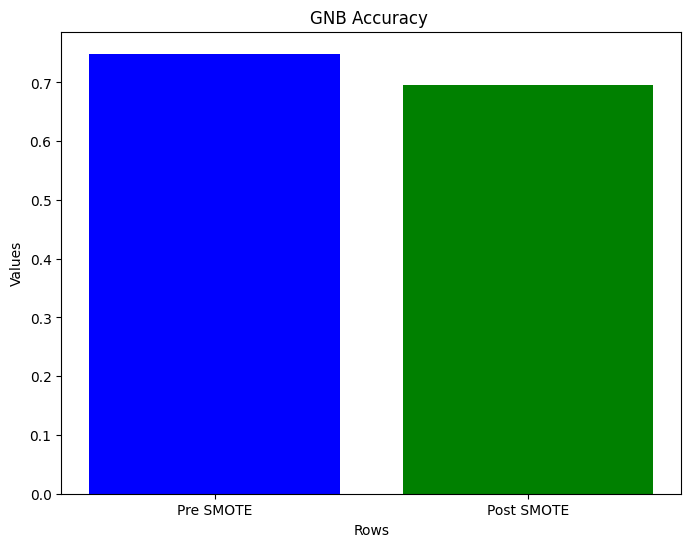

In [14]:

row1_value = df_results['Accuracy'].iloc[23]  
row2_value = df_results['Accuracy'].iloc[27] 

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('GNB Accuracy ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

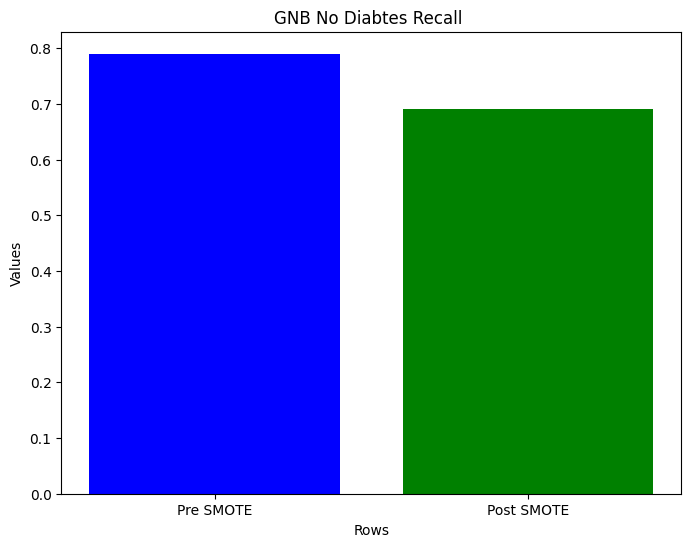

In [15]:
row1_value = df_results['Recall (0.0)'].iloc[23]  
row2_value = df_results['Recall (0.0)'].iloc[27]

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])


plt.title('GNB No Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

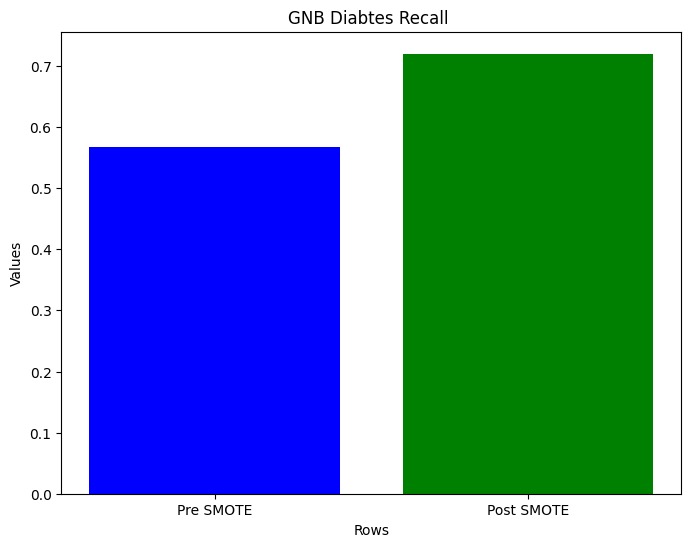

In [16]:
row1_value = df_results['Recall (1.0)'].iloc[23]  
row2_value = df_results['Recall (1.0)'].iloc[27]  

plt.figure(figsize=(8, 6))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])
plt.title('GNB Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

## SVM

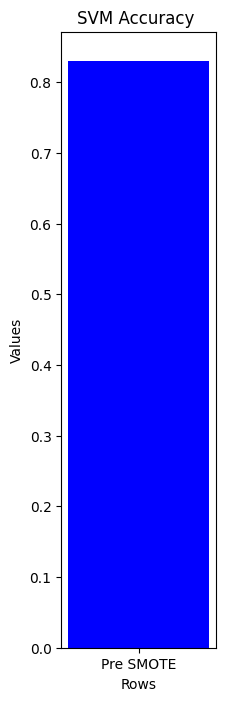

In [17]:
row1_value = df_results['Accuracy'].iloc[31]  
row2_value = df_results['Accuracy'].iloc[34] 

plt.figure(figsize=(2, 8))
plt.bar(['Pre SMOTE'], [row1_value, ], color=['blue', 'green'])


plt.title('SVM Accuracy ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

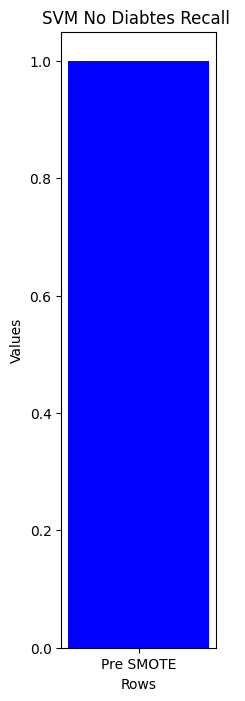

In [18]:
row1_value = df_results['Recall (0.0)'].iloc[31] 
row2_value = df_results['Recall (0.0)'].iloc[34]  
plt.figure(figsize=(2, 8))
plt.bar(['Pre SMOTE', 'Post SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('SVM No Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()

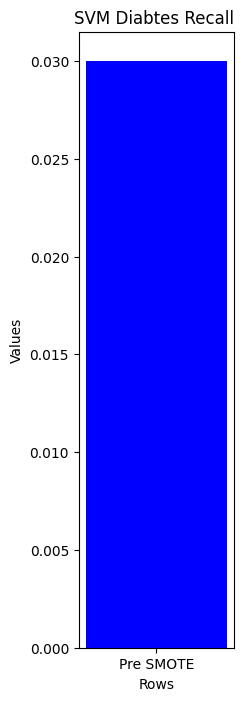

In [20]:
row1_value = df_results['Recall (1.0)'].iloc[31]  
row2_value = df_results['Recall (1.0)'].iloc[34]  

plt.figure(figsize=(2, 8))
plt.bar(['Pre SMOTE'], [row1_value, row2_value], color=['blue', 'green'])

plt.title('SVM Diabtes Recall ')
plt.xlabel('Rows')
plt.ylabel('Values')

plt.show()